In [26]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1 MB 2.6 MB/s eta 0:00:01
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=33e8de68ca315b90a94b43e6de4569611dd1ab03fba97e69bfc95dc12a4b847b
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize-matplotlib


# 探索的データ分析
##### ・探索的データ分析は、データ・セットを分析および調査し、主な特性を要約するために使用する手法。
##### ・データ可視化の手法が活用され,パターンを見つけ出すことや、異常に気付き、仮説を検証し、仮定を確認することを容易にする

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

### データの読み込み

In [4]:
df = pd.read_csv("hotel_reviews.csv")

In [6]:
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [7]:
df.shape # 10000sample, 14column

(10000, 14)

In [8]:
# データの詳細
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   性別             10000 non-null  object
 1   年齢             10000 non-null  int64 
 2   個人/グループ        10000 non-null  object
 3   旅行の目的          10000 non-null  object
 4   Wifi設備         10000 non-null  int64 
 5   送迎の便利さ         10000 non-null  int64 
 6   オンライン予約のしやすさ   10000 non-null  int64 
 7   ホテルの立地         10000 non-null  int64 
 8   食事の満足度         10000 non-null  int64 
 9   滞在時の快適さ        10000 non-null  int64 
 10  チェックイン・アウトの接客  10000 non-null  int64 
 11  その他のサービス       10000 non-null  int64 
 12  清潔さ            10000 non-null  int64 
 13  満足度            10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum() # 欠損値の確認

性別               0
年齢               0
個人/グループ          0
旅行の目的            0
Wifi設備           0
送迎の便利さ           0
オンライン予約のしやすさ     0
ホテルの立地           0
食事の満足度           0
滞在時の快適さ          0
チェックイン・アウトの接客    0
その他のサービス         0
清潔さ              0
満足度              0
dtype: int64

## 変数の集計、可視化

In [18]:
# 目的変数の平均値、中央値、最頻値
print(f"平均値：{df['満足度'].mean()}")
print(f"中央値：{df['満足度'].median()}")
print(f"最頻値：{df['満足度'].mode()}")

平均値：3.2019
中央値：3.0
最頻値：0    3
Name: 満足度, dtype: int64


<AxesSubplot: >

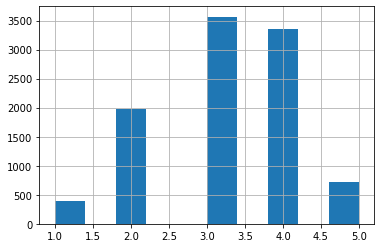

In [20]:
# ヒストグラム
df['満足度'].hist()

In [21]:
# 集計
df['満足度'].value_counts()

3    3566
4    3349
2    1976
5     716
1     393
Name: 満足度, dtype: int64

In [28]:
x = df['満足度'].value_counts()

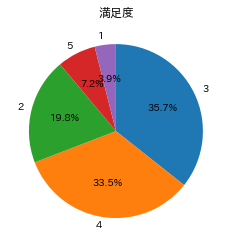

In [35]:
plt.title('満足度')
plt.pie(x, labels=x.index, autopct='%.1f%%', startangle=90, counterclock=False);

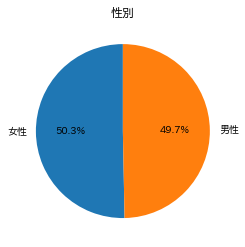

In [37]:
x = df['性別'].value_counts()
plt.title('性別')
plt.pie(x, labels=x.index, autopct='%.1f%%', startangle=90);

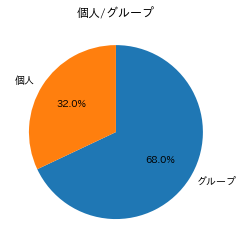

In [41]:
x = df['個人/グループ'].value_counts()
plt.title('個人/グループ')
plt.pie(x, labels=x.index, autopct='%.1f%%', startangle=90, counterclock=False);

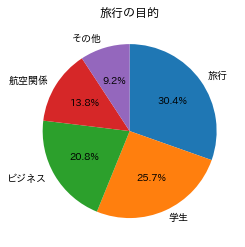

In [39]:
x = df['旅行の目的'].value_counts()
plt.title('旅行の目的')
plt.pie(x, labels=x.index, autopct='%.1f%%', startangle=90, counterclock=False);

In [43]:
df.describe()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.486800,2.814000,3.104400,2.841000,2.989100,3.20040,3.438700,3.293900,3.646200,3.281900,3.201900
std,15.175528,1.248984,1.482404,1.331201,1.274654,1.32658,1.316441,1.261936,1.168829,1.310116,0.967176
min,7.000000,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,27.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000
50%,40.000000,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,51.000000,4.000000,4.000000,4.000000,4.000000,4.00000,5.000000,4.000000,5.000000,4.000000,4.000000
max,80.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


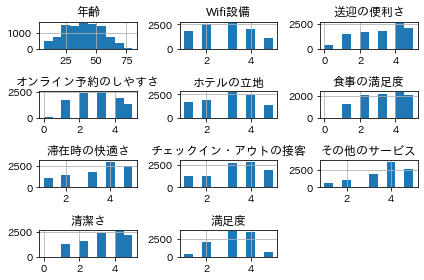

In [48]:
df.hist();
plt.tight_layout()

### 変数の関連性の集計、可視化

In [51]:
pd.crosstab(df['満足度'], df['性別'])

性別,女性,男性
満足度,,
1,157,236
2,959,1017
3,1880,1686
4,1692,1657
5,343,373


<AxesSubplot: xlabel='満足度', ylabel='count'>

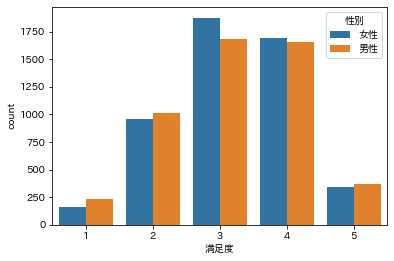

In [53]:
sns.countplot(x='満足度', hue='性別', data=df)

<AxesSubplot: xlabel='満足度', ylabel='count'>

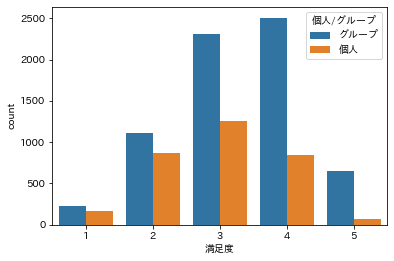

In [54]:
sns.countplot(x='満足度', hue='個人/グループ', data=df)

<AxesSubplot: xlabel='満足度', ylabel='count'>

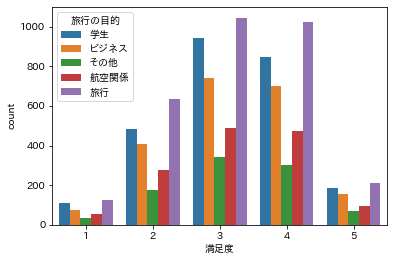

In [55]:
sns.countplot(x='満足度', hue='旅行の目的', data=df)